In [8]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = {
    'SquareFootage': [1500, 1800, 2400, 3000, 1100, 1600, 2000, 2500],
    'Bedrooms': [3, 4, 4, 5, 2, 3, 4, 4],
    'Bathrooms': [2, 2, 3, 3, 1, 2, 2, 3],
    'Price': [300000, 350000, 450000, 550000, 200000, 320000, 400000, 480000]
}

In [10]:
df = pd.DataFrame(data)

In [11]:
print("First 5 rows:")
print(df.head())



First 5 rows:
   SquareFootage  Bedrooms  Bathrooms   Price
0           1500         3          2  300000
1           1800         4          2  350000
2           2400         4          3  450000
3           3000         5          3  550000
4           1100         2          1  200000


In [12]:

print("\nLast 5 rows:")
print(df.tail())



Last 5 rows:
   SquareFootage  Bedrooms  Bathrooms   Price
3           3000         5          3  550000
4           1100         2          1  200000
5           1600         3          2  320000
6           2000         4          2  400000
7           2500         4          3  480000


In [13]:
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']


In [14]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [15]:
model = LinearRegression()
model.fit(X_normalized, y)

LinearRegression()

In [16]:
print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)


Model Intercept: 205770.52868391448
Model Coefficients: [240011.24859393  62969.6287964   46816.64791901]


In [17]:
predictions = model.predict(X_normalized)

In [18]:
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)



Model Evaluation:
Mean Squared Error: 72694038.24521944
R-squared (R²): 0.9933527383230547


In [19]:
new_house = pd.DataFrame([[2100, 4, 2]], columns=['SquareFootage', 'Bedrooms', 'Bathrooms'])
new_house_normalized = scaler.transform(new_house)
predicted_price = model.predict(new_house_normalized)
print(f"\nPredicted price for 2100 sqft, 4 bed, 2 bath: ${predicted_price[0]:,.2f}")



Predicted price for 2100 sqft, 4 bed, 2 bath: $397,480.31


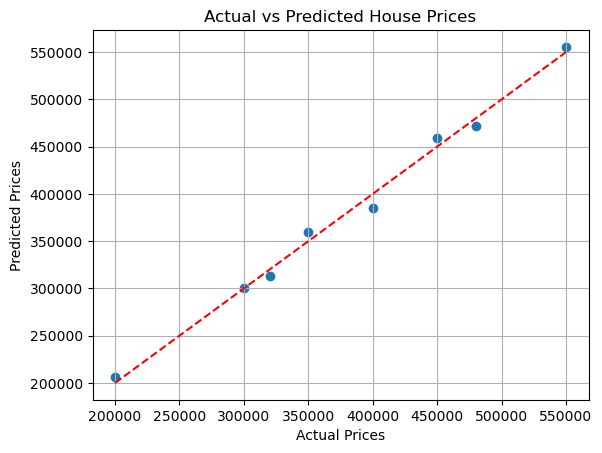

In [20]:
plt.scatter(y, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.show()